In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

In [2]:
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,8)

pd.options.mode.chained_assignment = None

In [3]:
df = pd.read_csv('Salary.csv')
df

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,18/01/2021 15:05:50,31.0,Male,Berlin,Backend Developer,9,5,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",...,72000,26,Full-time employee,Unlimited contract,English,51-100,Product,Yes,NaN,NaN
1249,18/01/2021 17:46:02,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,1.5,Senior,consumer analysis,NaN,...,2500,unlimited,Full-time employee,Unlimited contract,English,1000+,Product,No,NaN,0
1250,18/01/2021 23:20:35,39.0,Male,Munich,IT Operations Manager,15,2,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",...,NaN,28,Full-time employee,Unlimited contract,English,101-1000,eCommerce,No,NaN,NaN
1251,19/01/2021 10:17:58,26.0,Male,Saarbrücken,Frontend Developer,7,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",...,36400,27,Full-time employee,Unlimited contract,German,101-1000,Product,No,NaN,0


In [4]:

df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)


['Age' 'Yearly brutto salary (without bonus and stocks) in EUR'
 'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country'
 'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week']


In [5]:

df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)


['Timestamp' 'Gender' 'City' 'Position ' 'Total years of experience'
 'Years of experience in Germany' 'Seniority level'
 'Your main technology / programming language'
 'Other technologies/programming languages you use often'
 'Yearly bonus + stocks in EUR'
 'Annual bonus+stocks one year ago. Only answer if staying in same country'
 'Number of vacation days' 'Employment status' 'Сontract duration'
 'Main language at work' 'Company size' 'Company type'
 'Have you lost your job due to the coronavirus outbreak?'
 'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR']


<AxesSubplot:>

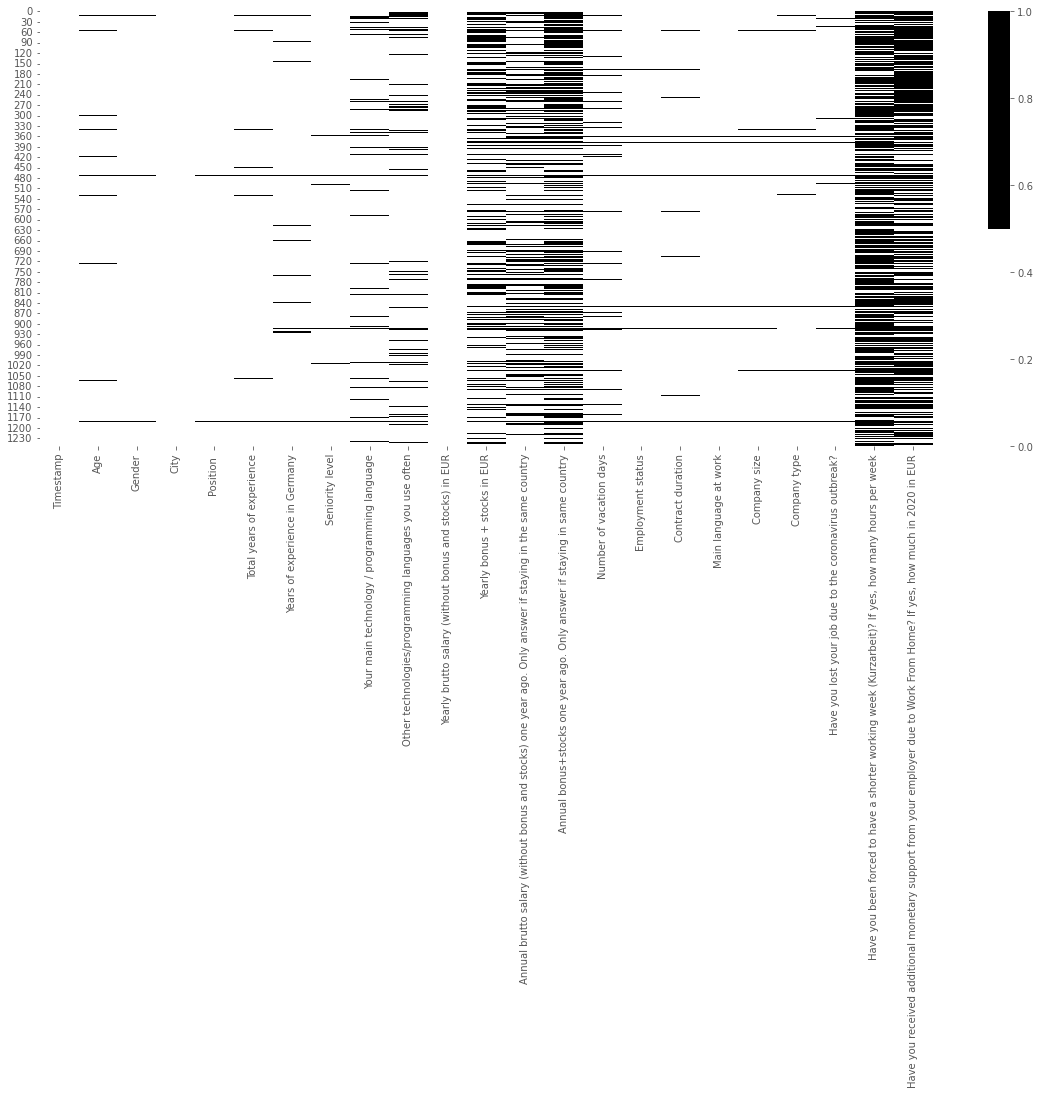

In [6]:
cols = df.columns[:30] 
colours = ['white', 'black'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [7]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    

Timestamp - 0%
Age - 2%
Gender - 1%
City - 0%
Position  - 0%
Total years of experience - 1%
Years of experience in Germany - 3%
Seniority level - 1%
Your main technology / programming language - 10%
Other technologies/programming languages you use often - 13%
Yearly brutto salary (without bonus and stocks) in EUR - 0%
Yearly bonus + stocks in EUR - 34%
Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country - 29%
Annual bonus+stocks one year ago. Only answer if staying in same country - 51%
Number of vacation days - 5%
Employment status - 1%
Сontract duration - 2%
Main language at work - 1%
Company size - 1%
Company type - 2%
Have you lost your job due to the coronavirus outbreak? - 2%
Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week - 70%
Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR - 63%


<AxesSubplot:xlabel='Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week', ylabel='Count'>

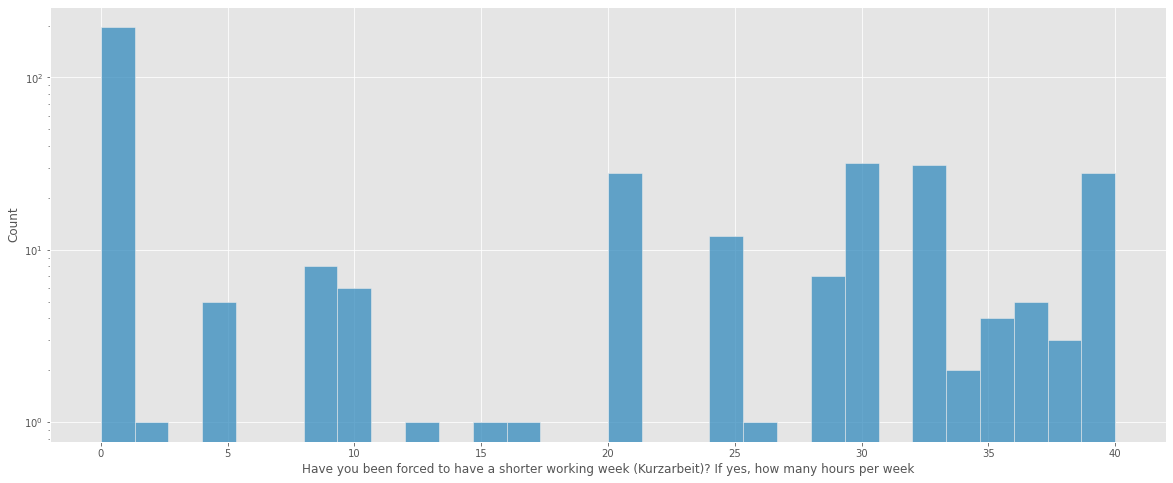

In [8]:
#4.до обработки
sns.histplot(data=df["Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week"], log_scale=(False, True), bins=30)

<AxesSubplot:>

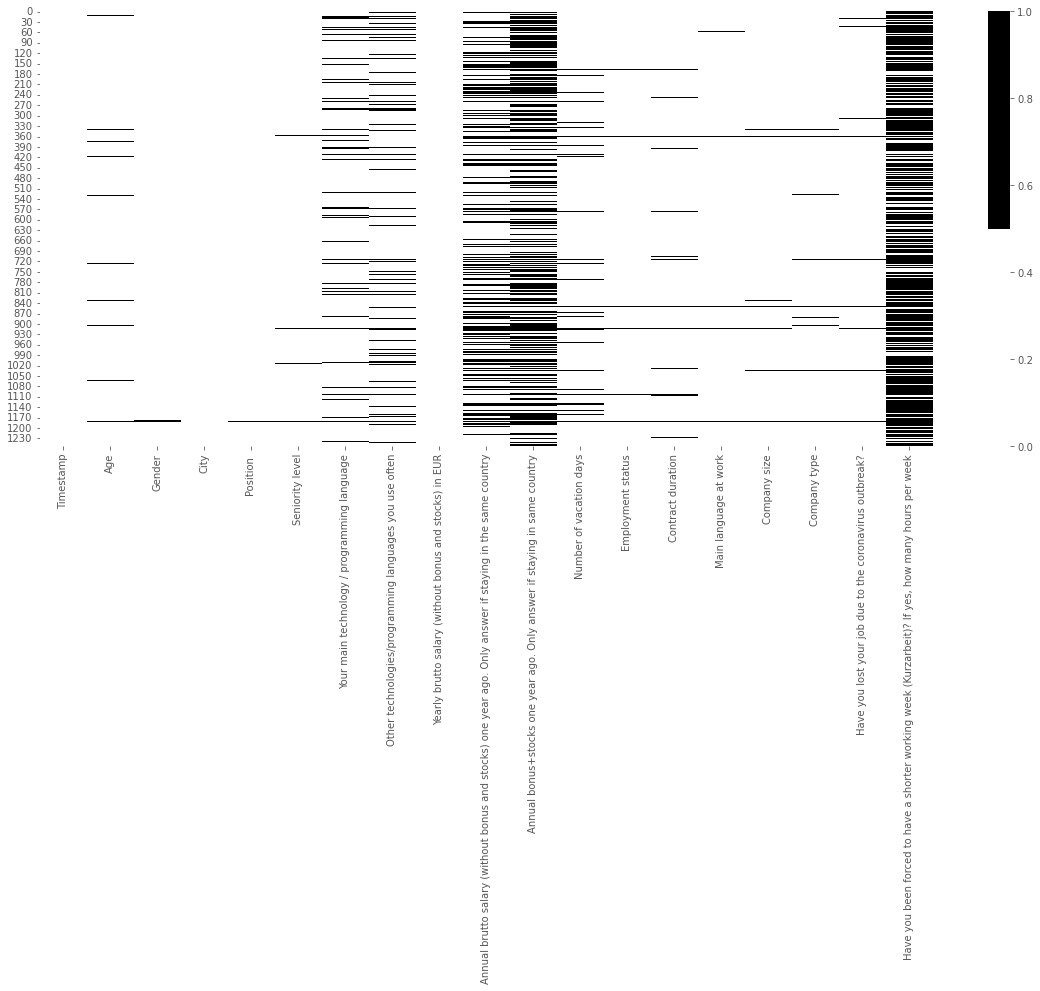

In [9]:
dropcols = ['Total years of experience','Yearly bonus + stocks in EUR','Years of experience in Germany','Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR']
df = df.drop(columns=dropcols)
cols = df.columns[:20]
colors = ['white', 'black'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colors))

In [10]:
#заполнили средними
med = df['Age'].median()
print(med)
df['Age'] = df['Age'].fillna(med)

32.0


<AxesSubplot:>

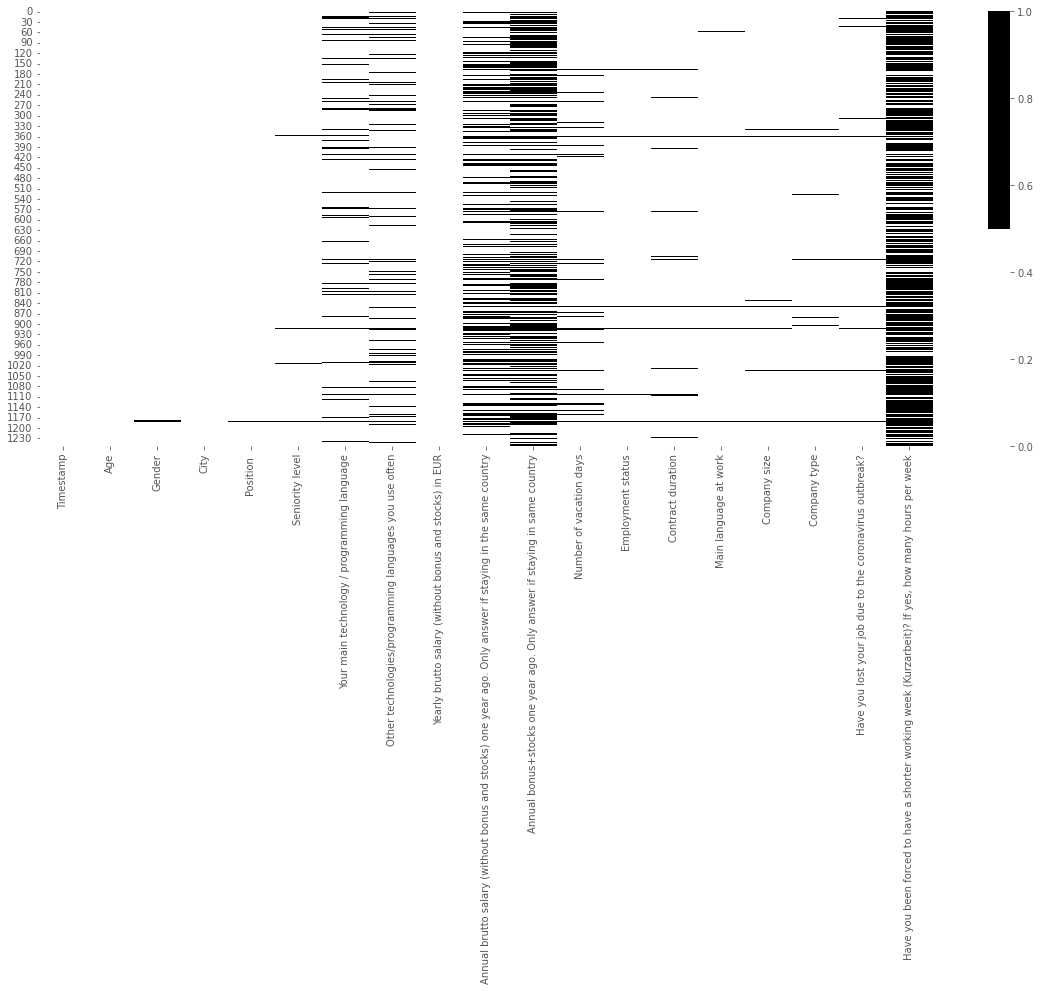

In [11]:
cols = df.columns[:20] 
colours = ['white', 'black'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [12]:
sur = df['Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week'].mean()
print(sur)
df['Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week'] = df['Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week'].fillna(sur)

12.967828418230564


In [13]:
dead = df['Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week'].bfill()
print(dead)
df['Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week'] = df['Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week'].fillna(dead)

0       12.967828
1       12.967828
2       12.967828
3       12.967828
4       12.967828
          ...    
1248    12.967828
1249    12.967828
1250    12.967828
1251    12.967828
1252    30.000000
Name: Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week, Length: 1253, dtype: float64


<AxesSubplot:>

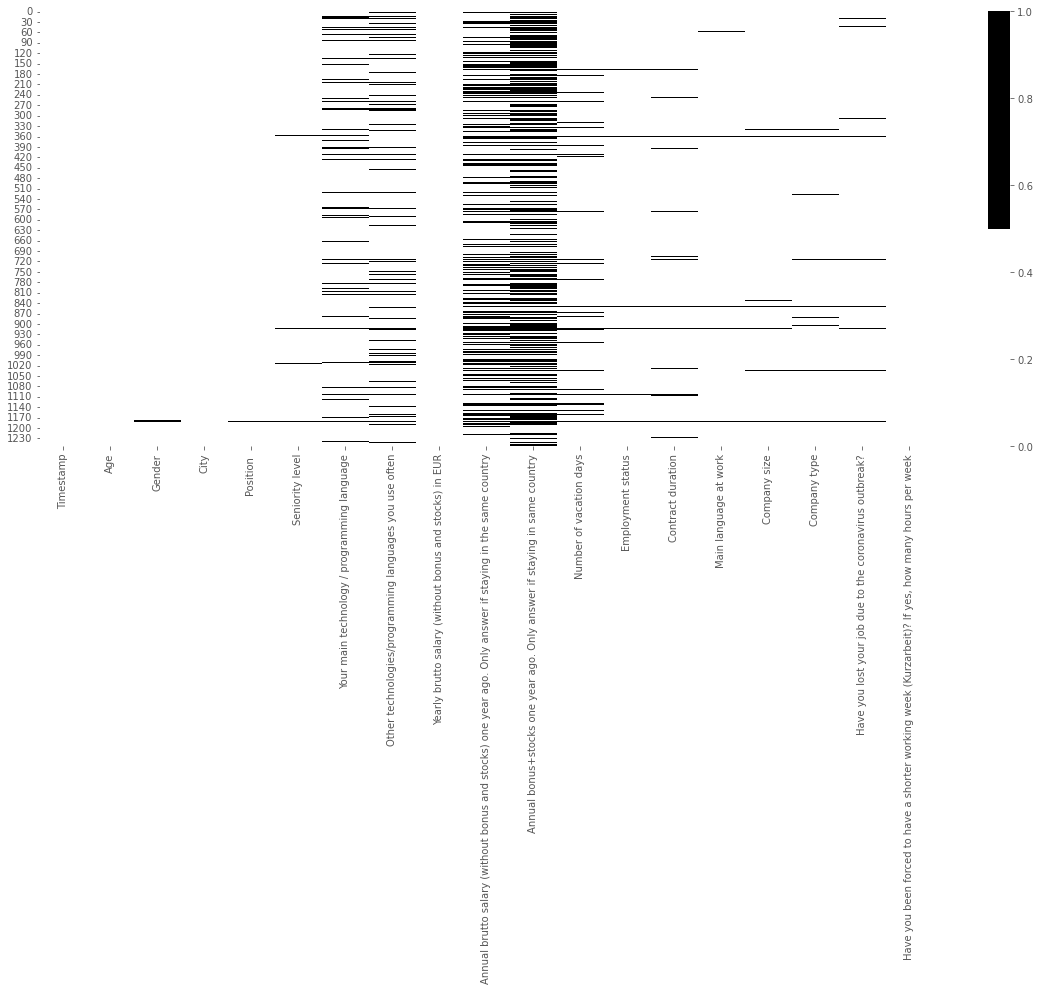

In [14]:
cols = df.columns[:20] 
colours = ['white', 'black'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

<AxesSubplot:xlabel='Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week', ylabel='Count'>

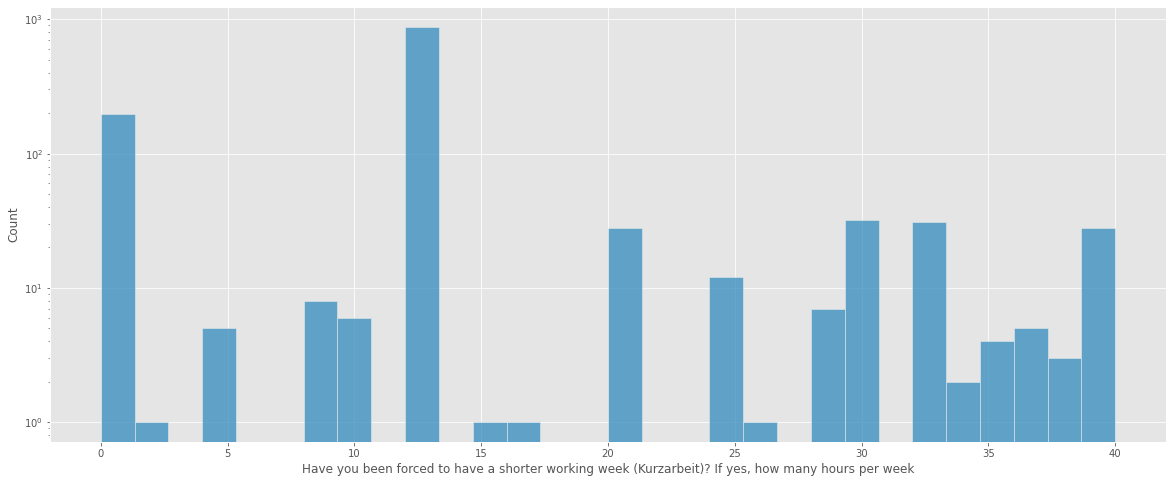

In [15]:
#4 после обработки
sns.histplot(data=df["Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week"], log_scale=(False, True), bins=30)

{'whiskers': [<matplotlib.lines.Line2D at 0x26abb42f880>,
 'caps': [<matplotlib.lines.Line2D at 0x26abb42ff10>,
 'boxes': [<matplotlib.lines.Line2D at 0x26abb42f430>],
 'medians': [<matplotlib.lines.Line2D at 0x26abb437670>],
 'fliers': [<matplotlib.lines.Line2D at 0x26abb437a00>],
 'means': []}

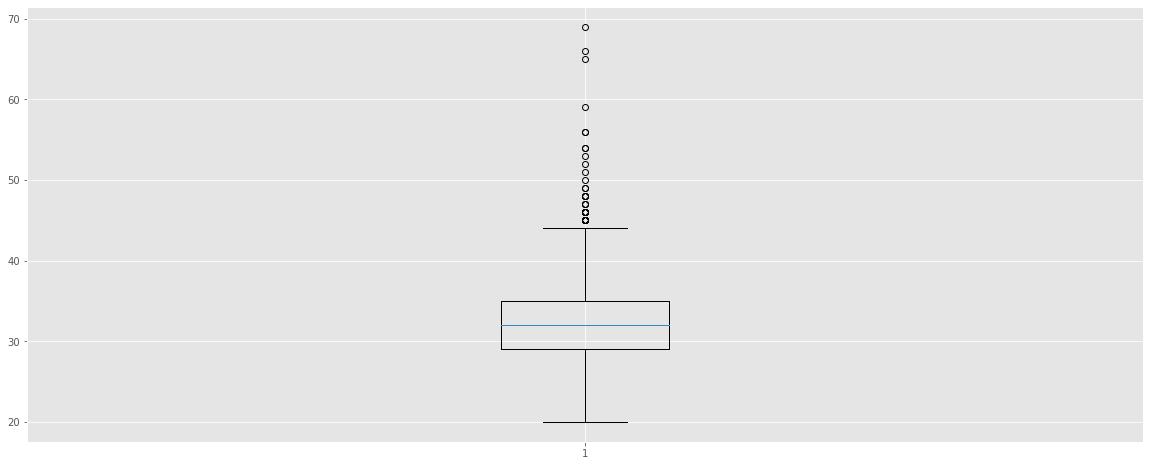

In [16]:
matplotlib.pyplot.boxplot(df["Age"])

{'whiskers': [<matplotlib.lines.Line2D at 0x26abd6fa970>,
 'caps': [<matplotlib.lines.Line2D at 0x26abd6e60d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26abd6fa5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x26abd6e67f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26abd6e6b80>],
 'means': []}

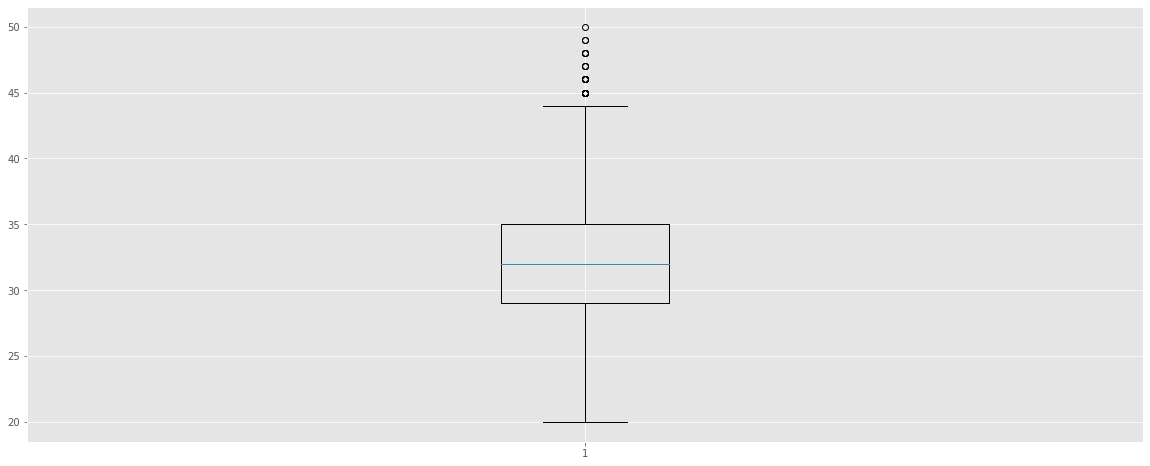

In [19]:
df = df.drop(df[(df.Age > 50)].index,axis = 0)
matplotlib.pyplot.boxplot(df["Age"])

In [20]:
df_numeric = df.select_dtypes(include=[np.number]) # Выбираем все числовые данные-параметры
df=df_numeric
df.to_csv('finaldata.csv')

df.head()

,Age,Yearly brutto salary (without bonus and stocks) in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week"
0,26.0,80000.0,75000.0,12.967828
1,26.0,80000.0,82000.0,12.967828
2,29.0,120000.0,100000.0,12.967828
3,28.0,54000.0,NaN,12.967828
4,37.0,62000.0,62000.0,12.967828
